<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_word_embedding(CoVe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tokenization is the first step in natural language processing (NLP) projects. It involves dividing a text into individual units, known as tokens. Tokens can be words or punctuation marks. These tokens are then transformed into numerical vectors representing words. Two main concepts are vectorization and embedding. Text Vectorization is the process of turning words into numerical vectors in a one-dimensional space. Word Embedding (Word Vector) is a type of vectorization through deep learning as dense vectors in a high-dimensional space.
- Text Vectorization
  - Traditional approach
    - One-Hot Encoding
    - Bag of Words
    - CountVectorizer
    - TF-IDF
      
- Word Embedding
  - Context-independent
    - Neural Word Embedding
      - Word2Vec
    - Pretrained Word-Embedding
      - GloVe
      - FastText
  - Context-dependent
    - RNN based
      - ELMO
      - CoVe
    - Transformer based
      - BERT
      - XML
      - RoBERTa
      - ALBERT

- Document embedding
  - Doc2Vec
    - Distributed Memory (DM)
    - Distributed Bag of Words (DBOW)

#Word Embedding

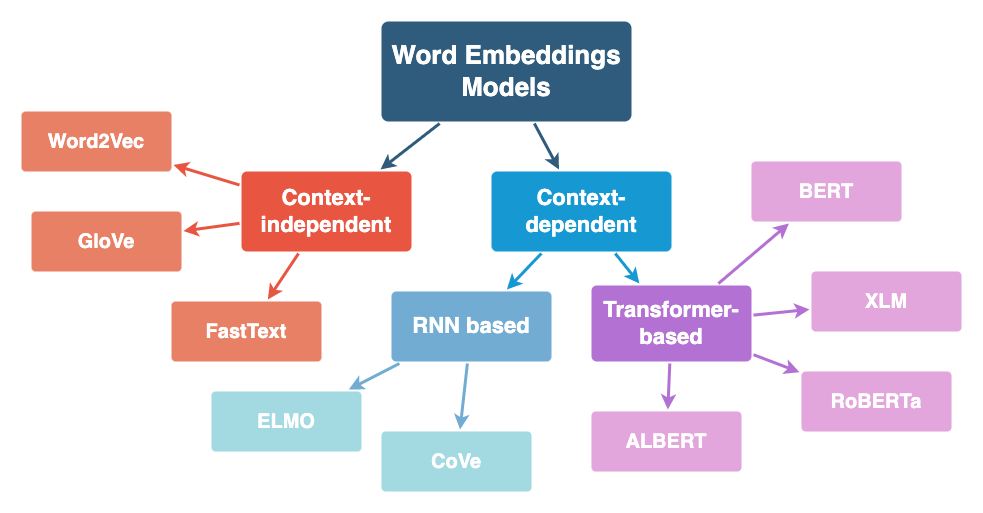

##Context-dependent

###RNN based

####CoVe

Like ELMO, CoVe (Contextualized Word Vectors) generates different embeddings for the same word depending on its context within a sentence. <Br>

CoVe uses a deep LSTM encoder from an attentional sequence-to-sequence (seq2seq) model which is pre-trained on a large parallel corpus for machine translation task. This allows the model to learn rich representations of words in various contexts.

- **Embedding Layer:** Word embeddings and convert tokens to dense vectors.
- **Bidirectional LSTM Encoder**: Process the embedded sequences to capture context from both directions.
- **Attention Mechanism**: Compute attention scores to focus on important parts of the sequence.
- **Fully Connected Layer:** Integrate features from the attention mechanism and produce the final output.

In [1]:
!pip -q install gutenbergpy

In [2]:
import os
import re

import nltk
# Download necessary NLTK resources
nltk.download('punkt')

from collections import Counter

import gutenbergpy.textget

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Prepare Data for Training

In [3]:
# Function to clean the text by removing headers and footers
def strip_headers(text):
    header_pattern = r"\*\*\* START OF (THIS|THE) PROJECT GUTENBERG EBOOK [^\*]+\*\*\*"
    footer_pattern = r"\*\*\* END OF (THIS|THE) PROJECT GUTENBERG EBOOK [^\*]+\*\*\*"
    header_match = re.search(header_pattern, text)
    footer_match = re.search(footer_pattern, text)
    if header_match and footer_match:
        start_idx = header_match.end()
        end_idx = footer_match.start()
        text = text[start_idx:end_idx]
    return text.strip()

# Function to download and clean a book by its Gutenberg ID
def download_gutenberg_book(book_id):
    text = gutenbergpy.textget.get_text_by_id(book_id)
    text = text.decode('utf-8')
    cleaned_text = strip_headers(text)
    return cleaned_text

# List of book IDs to download
book_ids = [1342, 84, 11]  # Example IDs: "Pride and Prejudice", "Frankenstein", "Alice's Adventures in Wonderland"
# Directory to save the books
output_dir = "gutenberg_books"
os.makedirs(output_dir, exist_ok=True)
for book_id in book_ids:
    book_text = download_gutenberg_book(book_id)
    with open(os.path.join(output_dir, f"book_{book_id}.txt"), "w", encoding="utf-8") as f:
        f.write(book_text)
print(f"Downloaded and saved {len(book_ids)} books to '{output_dir}'")

Downloaded and saved 3 books to 'gutenberg_books'


In [4]:
# Function to read the text from a file
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Function to clean the text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\W+', ' ', text.lower()).strip()
    return text

# List of book files to read
file_paths = ['gutenberg_books/book_1342.txt', 'gutenberg_books/book_84.txt', 'gutenberg_books/book_11.txt']

# Read and clean text data
all_text = ""
for file_path in file_paths:
    book_text = read_text_file(file_path)
    all_text += book_text + " "

# Clean and tokenize the text data
sentences = [clean_text(text) for text in nltk.sent_tokenize(all_text)][:1000]
print(f"Total sentences: {len(sentences)}")

Total sentences: 1000


In [5]:
import torch
#Example
# Create sequences of words and targets
ex_sent = sentences[0]
print('ex_sent: ', ex_sent)
ex_tokenized_sent = nltk.word_tokenize(ex_sent)
print('ex_tokenized_sent: ', ex_tokenized_sent)
ex_vocab = set(ex_tokenized_sent)
ex_word_to_index = {word: idx for idx, word in enumerate(ex_vocab)}
ex_sequences = []
ex_targets = []
ex_sequence_length = 5
for i in range(ex_sequence_length, len(ex_tokenized_sent)):
  seq = ex_tokenized_sent[i-ex_sequence_length:i]
  target = ex_tokenized_sent[i]
  print(f'sequence: {seq} => target: {target}')
  ex_sequences.append([ex_word_to_index[word] for word in seq])
  ex_targets.append(ex_word_to_index[target])
# Convert sequences and targets to tensors
ex_sequences = torch.tensor(ex_sequences, dtype=torch.long)
ex_targets = torch.tensor(ex_targets, dtype=torch.long)
print(f'sequences: {ex_sequences.shape}')
print(f'sequences: {ex_targets.shape}')

ex_sent:  illustration george allen publisher 156 charing cross road london ruskin house illustration _reading jane s letters _ _chap 34 _ pride
ex_tokenized_sent:  ['illustration', 'george', 'allen', 'publisher', '156', 'charing', 'cross', 'road', 'london', 'ruskin', 'house', 'illustration', '_reading', 'jane', 's', 'letters', '_', '_chap', '34', '_', 'pride']
sequence: ['illustration', 'george', 'allen', 'publisher', '156'] => target: charing
sequence: ['george', 'allen', 'publisher', '156', 'charing'] => target: cross
sequence: ['allen', 'publisher', '156', 'charing', 'cross'] => target: road
sequence: ['publisher', '156', 'charing', 'cross', 'road'] => target: london
sequence: ['156', 'charing', 'cross', 'road', 'london'] => target: ruskin
sequence: ['charing', 'cross', 'road', 'london', 'ruskin'] => target: house
sequence: ['cross', 'road', 'london', 'ruskin', 'house'] => target: illustration
sequence: ['road', 'london', 'ruskin', 'house', 'illustration'] => target: _reading
seque

In [6]:
import torch
# Create sequences of words and targets
def create_dataset(tokenized_sentences, word_to_index, sequence_length = 5):
  sequences = []
  targets = []
  for sentence in tokenized_sentences:
      for i in range(sequence_length, len(sentence)):
          seq = sentence[i-sequence_length:i]
          target = sentence[i]
          sequences.append([word_to_index[word] for word in seq])
          targets.append(word_to_index[target])
  # Convert sequences and targets to tensors
  sequences = torch.tensor(sequences, dtype=torch.long)
  targets = torch.tensor(targets, dtype=torch.long)
  return sequences, targets

# Tokenize sentences into words
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
print('Total tokenized sentences: ', len(tokenized_sentences))

# Flatten the list of tokenized sentences to create a vocabulary
all_words = [word for sentence in tokenized_sentences for word in sentence]
vocab = list(set(all_words))
print(f'vocab: {len(vocab)}, {vocab}')
word_to_index = {word: idx for idx, word in enumerate(vocab)}
print(f'word_to_index: {len(word_to_index)}, \n{word_to_index}')
index_to_word = {idx: word for word, idx in word_to_index.items()}
print(f'index_to_word: {len(index_to_word)}, \n{index_to_word}')

#Create sequences of words and targets
sequences, targets = create_dataset(tokenized_sentences, word_to_index)
print('sequences: ', sequences.shape)
print('targets: ', targets.shape)

Total tokenized sentences:  1000
vocab: 3951, ['refusal', 'excessively', 'sharing', 'xxxiv', 'confirming', 'bennets', 'contributes', 'breath', 'are', 'cough', 'materially', '154', 'creature', 'regulation', 'against', 'smile', 'understood', 'ease', 'cook', 'cost', 'while', 'dresses', 'interested', 'weeks', 'admiration', 'invalid', '476', 'earl', 'fears', 'pretend', 'summoned', 'changed', 'adapted', 'readily', 'court', 'gets', 'abusing', 'habit', 'intruding', 'england', 'longed', 'disposed', 'allowing', 'thrills', 'could', 'eyes', 'conjecturing', 'illustrations', 'times', 'second', 'guidance', 'misunderstanding', 'whose', 'troubling', 'ended', 'xlvi', 'kindly', 'beginning', 'net', 'solaced', 'published', 'for', 'badly', 'two', 'novelty', 'expressive', 'company', 'november', 'instead', 'display', 'emphatic', 'theatrical', 'jot', 'utterances', 'sit', 'engrossed', 'other', 'seeming', 'ill', 'protest', 'downwards', 'adventure', 'veneration', 'unguarded', '_here_', 'words', 'handsomer', 'rusk

In [7]:
# Create a custom dataset
from torch.utils.data import Dataset, DataLoader
class TextDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

# Create DataLoader
dataset = TextDataset(sequences, targets)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

CoVe Model

In [8]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Create a BoW vector for each word in the vocabulary
vectorizer = CountVectorizer(vocabulary=vocab)
vectorizer.fit(all_words)
# The number of unique words in the vocabulary
vocab_size = len(vocab)
print('vocab_size: ', vocab_size)
# The length of the BoW vector (same as the number of unique words)
embedding_dim = len(vectorizer.get_feature_names_out())
print('embedding_dim: ', embedding_dim)

# Initialize the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
# Fill the embedding matrix with BoW vectors
for word, idx in word_to_index.items():
    # The BoW vector for the current word
    bow_vector = vectorizer.transform([word]).toarray()
    embedding_matrix[idx] = bow_vector
print('embedding_matrix: ', embedding_matrix.shape)

# Parameters
hidden_dim = 128
print('hidden_dim: ', hidden_dim)
output_dim = vocab_size
print('output_dim: ', output_dim)

sequence, target = next(iter(dataloader))
print('sequence: ', sequence.shape, sequence)
print('target: ', target.shape, target)

vocab_size:  3951
embedding_dim:  3951
embedding_matrix:  (3951, 3951)
hidden_dim:  128
output_dim:  3951
sequence:  torch.Size([32, 5]) tensor([[ 124, 3588, 3906, 2200, 3112],
        [2623, 1448, 3472, 2775, 1183],
        [ 826, 2201, 2618,  358,  775],
        [2393, 1183, 1171, 2393, 2623],
        [3378, 1393, 2898, 2887, 1864],
        [2977, 2393, 1814, 2393, 1070],
        [1123,  362, 3349, 3445, 3112],
        [1498, 1657, 3472, 1362, 2581],
        [2869, 1684, 1772, 3860, 2357],
        [2200, 3611, 2088, 1533, 3112],
        [2178, 3299, 3213,   44, 1665],
        [3115,  124, 3255,  775, 2766],
        [3684, 3255,  880, 2200, 3093],
        [2178, 3796,  246, 2429, 1393],
        [2948, 2147, 1533, 1183,  565],
        [2898,   45, 1749,  382, 3040],
        [1544, 2178, 1269, 2178,  231],
        [3784, 3437, 1182, 1183, 3698],
        [3901, 2393, 3100,  339, 3442],
        [3777,  248, 1492, 3112,   63],
        [3371, 3924,  995, 3936, 1183],
        [1623, 2200, 11

In [9]:
#CoVe Model
import torch.nn as nn

#Embedding Layer: word embeddings and convert tokens to dense vectors.
embedding = nn.Embedding(vocab_size, embedding_dim)
print('embedding: ', embedding)
embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
print('embedding.weight: ', embedding.weight.shape)
embedding.weight.requires_grad = False  # Use pre-trained embeddings without updating them
embedded = embedding(sequence)
print(f'sequence: {sequence.shape} => embedded: {embedded.shape}')

embedding:  Embedding(3951, 3951)
embedding.weight:  torch.Size([3951, 3951])
sequence: torch.Size([32, 5]) => embedded: torch.Size([32, 5, 3951])


LSTM

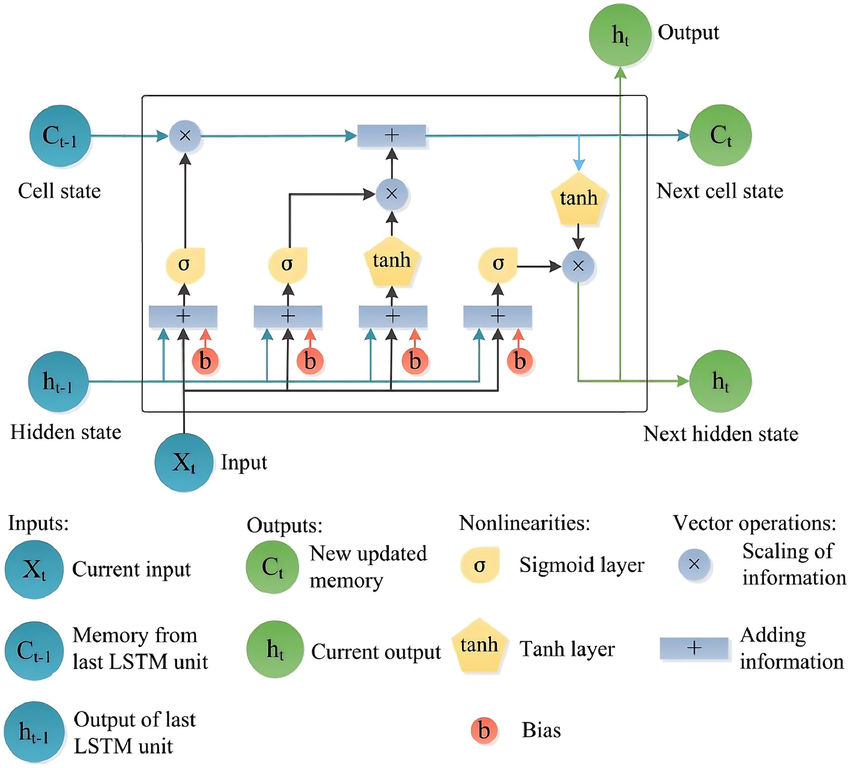

Bi-directional LSTM

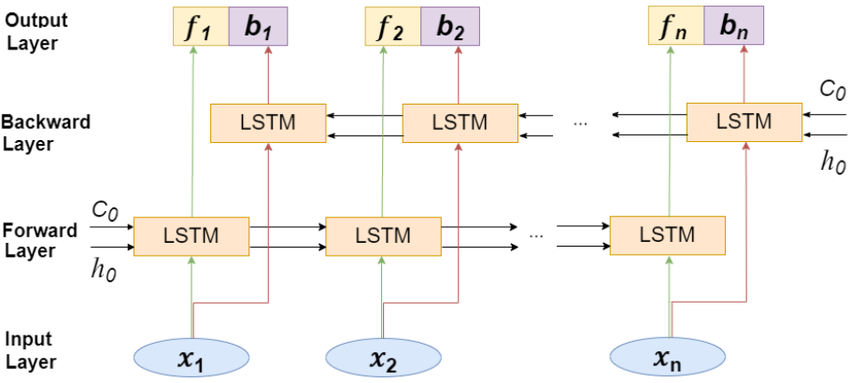

In [10]:
#Bidirectional LSTM Encoder: Process the embedded sequences to capture context from both directions.
bilstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, bidirectional=True, batch_first=True)
print('Bi-directional LSTM: ', bilstm)
bilstm_out, lstm_cell_states = bilstm(embedded)
print('Contextualized Word Representation (both forward and backward directions): ', bilstm_out.shape)
print(f'Where: number of sequence in a batch: {bilstm_out.shape[0]}, \
number of word in a sequence: {bilstm_out.shape[1]} \
and word embedding length: {bilstm_out.shape[2]}')
print('Contextualized Word Representation (only forward direction): ', bilstm_out[:, :, :hidden_dim].shape)
print('Contextualized Word Representation (only backward direction): ', bilstm_out[:, :, hidden_dim:].shape)

Bi-directional LSTM:  LSTM(3951, 128, num_layers=2, batch_first=True, bidirectional=True)
Contextualized Word Representation (both forward and backward directions):  torch.Size([32, 5, 256])
Where: number of sequence in a batch: 32, number of word in a sequence: 5 and word embedding length: 256
Contextualized Word Representation (only forward direction):  torch.Size([32, 5, 128])
Contextualized Word Representation (only backward direction):  torch.Size([32, 5, 128])


Seq2seq-model-with-attention

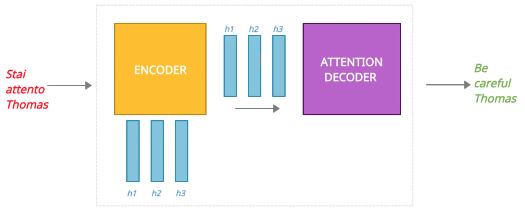

Source:https://towardsdatascience.com/classic-seq2seq-model-vs-seq2seq-model-with-attention-31527c77b28a

Attention Mechanism

- **Attention Weights**: The core idea is to calculate a set of weights that determine how much attention each part of the input sequence should receive when generating the output. These weights are typically learned during the training process.

- **Context Vector**: The attention mechanism generates a context vector, which is a weighted sum of the input representations. The context vector essentially captures the most relevant information from the input sequence, as determined by the attention weights.

- **Score Function**: This function computes a score for each input token, representing its relevance to the current output token being generated. Various scoring functions can be used, such as dot-product, additive, and scaled dot-product.

- **Softmax**: The scores are then passed through a softmax function to convert them into probabilities (attention weights) that sum to 1.

**Bahdanau attention**

https://machinelearningmastery.com/the-bahdanau-attention-mechanism/

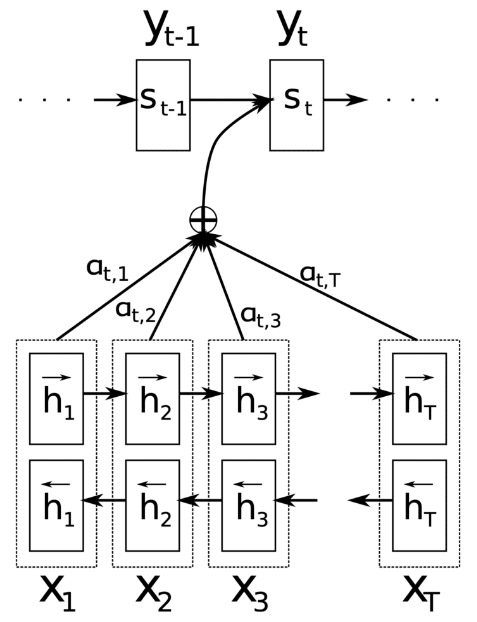

In [11]:
import torch
import torch.nn as nn
#The output of the BiLSTM is encoder, then using Attention Mechanism to decoder
#Attention Mechanism: Compute attention scores to focus on important parts of the sequence.

#learnable parameter (v)
v = nn.Parameter(torch.rand(hidden_dim))
print("Learnable parameter: ", v.shape)
print('==>')

#encoder hidden state (h)
h = bilstm_out.reshape(-1, bilstm_out.size(2))
print('Contextualized Word Representation: ', bilstm_out.shape)
print(f'Where: number of sequence in a batch: {bilstm_out.shape[0]}, number of word in a sequence: {bilstm_out.shape[1]} \
and word embedding length: {bilstm_out.shape[2]}')
print('Reshaped contextualized Word Representation: ', h.shape)
print(f'Where: number of word in a batch: {h.shape[0]} and word embedding length: {h.shape[1]}')
print('==>')

#computes the alignment scores between the encoder hidden state (h) and the learnable parameter (v)
#reduces dimensionality of both the forward and backward passes back to hidden_dim
attn = nn.Linear(hidden_dim * 2, hidden_dim) #word embedding length: 256 => 128
print('Attention: ', attn)
energy = torch.tanh(attn(h))
print('Encoder hidden state: ', energy.shape)
print(f'Where: number of word in a batch: {energy.shape[0]} and word embedding length: {energy.shape[1]}')
energy = energy @ v
print('Alignment scores: ', energy.shape)
print('==>')

#compute the attention scores, create a weighted sum of the BiLSTM outputs and form the context vector
timestep = bilstm_out.size(1)
print('Number of words  of the sequence: ', timestep)
attn_energies = energy.view(-1, timestep)
print('Attention scores: ', attn_energies.shape)
attn_weights = nn.functional.softmax(attn_energies, dim=1).unsqueeze(1)
print('Attention weights: ', attn_weights.shape)
context = attn_weights.bmm(bilstm_out)
print('context vector: ', context.shape)
print('==>')

#The context vector is passed through a linear layer to produce the desired output dimension.
fc = nn.Linear(hidden_dim * 2, output_dim)
print('Linear layer: ', fc)
output = fc(context.squeeze(1))
print(f'Decoder hidden state: {context.squeeze(1).shape} => {output.shape}')

Learnable parameter:  torch.Size([128])
==>
Contextualized Word Representation:  torch.Size([32, 5, 256])
Where: number of sequence in a batch: 32, number of word in a sequence: 5 and word embedding length: 256
Reshaped contextualized Word Representation:  torch.Size([160, 256])
Where: number of word in a batch: 160 and word embedding length: 256
==>
Attention:  Linear(in_features=256, out_features=128, bias=True)
Encoder hidden state:  torch.Size([160, 128])
Where: number of word in a batch: 160 and word embedding length: 128
Alignment scores:  torch.Size([160])
==>
Number of words  of the sequence:  5
Attention scores:  torch.Size([32, 5])
Attention weights:  torch.Size([32, 1, 5])
context vector:  torch.Size([32, 1, 256])
==>
Linear layer:  Linear(in_features=256, out_features=3951, bias=True)
Decoder hidden state: torch.Size([32, 256]) => torch.Size([32, 3951])


In [12]:
import numpy as np
import torch.nn as nn
import torch.optim as optim

class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Parameter(torch.rand(hidden_dim))
    def forward(self, encoder_outputs):
        timestep = encoder_outputs.size(1)
        h = encoder_outputs.reshape(-1, encoder_outputs.size(2))
        attn_energies = self.score(h).view(-1, timestep)
        return nn.functional.softmax(attn_energies, dim=1).unsqueeze(1)
    def score(self, h):
        energy = torch.tanh(self.attn(h))
        energy = energy @ self.v
        return energy

class CoVe(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, embedding_matrix):
        super(CoVe, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # Use pre-trained embeddings without updating them
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, bidirectional=True, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
    def forward(self, x):
        embedded = self.embedding(x)
        bilstm_out, _ = self.bilstm(embedded)
        attn_weights = self.attention(bilstm_out)
        context = attn_weights.bmm(bilstm_out)
        output = self.fc(context.squeeze(1))
        return output

# Initialize the CoVe model
sequence, target = next(iter(dataloader))
cove_model = CoVe(vocab_size, embedding_dim, hidden_dim, output_dim, embedding_matrix)
cove_model(sequence).shape

torch.Size([32, 3951])

Training

In [13]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Create a BoW vector for each word in the vocabulary
vectorizer = CountVectorizer(vocabulary=vocab)
vectorizer.fit(all_words)
# The number of unique words in the vocabulary
vocab_size = len(vocab)
# The length of the BoW vector (same as the number of unique words)
embedding_dim = len(vectorizer.get_feature_names_out())
# Initialize the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
# Fill the embedding matrix with BoW vectors
for word, idx in word_to_index.items():
    # The BoW vector for the current word
    bow_vector = vectorizer.transform([word]).toarray()
    embedding_matrix[idx] = bow_vector

# Parameters
hidden_dim = 128
output_dim = vocab_size

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cove_model.parameters(), lr=0.001)

In [15]:
# Training loop
losses = []
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for sequences, targets in dataloader:
        optimizer.zero_grad()
        outputs = cove_model(sequences)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # Compute the average loss for this epoch
    avg_epoch_loss = total_loss / len(dataloader)
    losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader)}")

Epoch 1/5, Loss: 6.009736017913235
Epoch 2/5, Loss: 5.517414662302757
Epoch 3/5, Loss: 5.054800215728429
Epoch 4/5, Loss: 4.5662259152349165
Epoch 5/5, Loss: 4.022657636781128


plotting losses: 


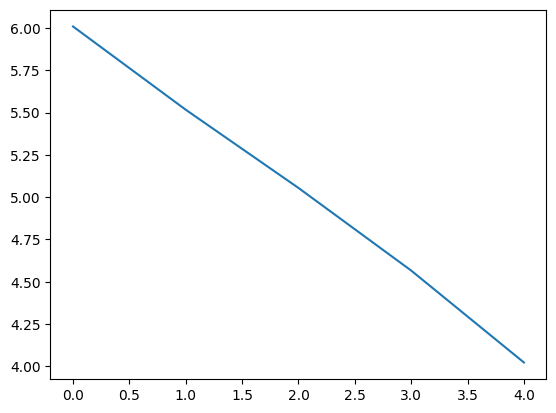

In [16]:
#plotting losses
import matplotlib.pyplot as plt
print('plotting losses: ')
li = list(zip(range(len(losses)), losses))
plt.plot(*zip(*li))

Obtain contextualized word embeddings using a trained CoVe model

In [39]:
input_text = "This is an example for word"
# Preprocess the input text
def preprocess_text(text):
    sentences = nltk.sent_tokenize(text.lower())
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    return tokenized_sentences
tokenized_sentences = preprocess_text(input_text)
print(f'input_text: {input_text} => tokenized_sentences: {tokenized_sentences}')

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences, word_to_index):
    sequences = []
    for sentence in tokenized_sentences:
        seq_indices = [word_to_index[word] for word in sentence]
        sequences.append(seq_indices)
    return sequences
sequences = tokens_to_indices(tokenized_sentences, word_to_index)
print(f'tokenized_sentences: {tokenized_sentences} => indices_sequences: {sequences}')

# Pad sequences to the same length
def pad_sequences(sequences, max_len):
    padded_sequences = torch.zeros((len(sequences), max_len), dtype=torch.long)
    for i, seq in enumerate(sequences):
        padded_sequences[i, :len(seq)] = torch.tensor(seq, dtype=torch.long)
    return padded_sequences
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, max_len)
print(f'max_len: {max_len} => indices_sequences: {sequences} => padded_sequences: {padded_sequences}')

# Function to get contextualized embeddings
def get_contextualized_embeddings(model, padded_sequences):
    model.eval()
    with torch.no_grad():
        embedded_sequences = model(padded_sequences)
    return embedded_sequences
contextualized_embeddings = get_contextualized_embeddings(cove_model, padded_sequences)
print(f'input_text: {input_text} => contextualized_embeddings: {contextualized_embeddings.shape} \n{contextualized_embeddings}')

input_text: This is an example for word => tokenized_sentences: [['this', 'is', 'an', 'example', 'for', 'word']]
tokenized_sentences: [['this', 'is', 'an', 'example', 'for', 'word']] => indices_sequences: [[2357, 2453, 3611, 3749, 61, 3147]]
max_len: 6 => indices_sequences: [[2357, 2453, 3611, 3749, 61, 3147]] => padded_sequences: tensor([[2357, 2453, 3611, 3749,   61, 3147]])
input_text: This is an example for word => contextualized_embeddings: torch.Size([1, 3951]) 
tensor([[-10.7166,  -8.2271,  -8.1419,  ...,  -9.1875,  -5.2038, -11.6914]])
